# **REGULARIZATION**

---
---

## **HAND WRITTEN DIGIT PREDICTION**

  **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

**Load Data**

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

**Split Data - Training, Validation and Test**

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Scaling the dataset by/255.

X_train, X_valid = X_train_full[5000:]/255., X_train_full[:5000]/255.
y_train, y_valid = y_train_full[5000:], y_train_full[:5000]

X_test = X_test/255.

**Build Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

from tensorflow.keras import regularizers

In [ ]:
  model = Sequential()

  # Input Layer
  model.add(Flatten(input_shape = [28, 28]))

  # Hidden Layer
  model.add(Dense(64, activation = "relu", kernel_regularizer = regularizers.L2(1e-4)))
  model.add(Dropout(0.2))

  model.add(Dense(32, activation = "relu", kernel_regularizer = L1L2(l1=1e-5, l2=1e-4)))
  model.add(Dropout(0.2))


  model.add(Dense(16, activation = "relu", kernel_regularizer = L1(1e-5)))
  model.add(Dropout(0.2))

  model.add(Dense(10, activation = "softmax"))


In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dropout_3 (Dropout)         (None, 16)              

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

**Model Training**

In [ ]:
model.fit(X_train, y_train, epochs = 5, validation_data = [X_valid, y_valid], batch_size = 32)

Epoch 1/5
1719/1719 [==============================] - 8s 4ms/step - loss: 1.4058 - accuracy: 0.5259 - val_loss: 0.5794 - val_accuracy: 0.8626
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7803 - accuracy: 0.7519 - val_loss: 0.3994 - val_accuracy: 0.9022
Epoch 3/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6325 - accuracy: 0.8106 - val_loss: 0.3345 - val_accuracy: 0.9178
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5470 - accuracy: 0.8408 - val_loss: 0.2840 - val_accuracy: 0.9298
Epoch 5/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4945 - accuracy: 0.8587 - val_loss: 0.2533 - val_accuracy: 0.9406


In [ ]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.405806,0.525873,0.579416,0.8626
1,0.780316,0.751927,0.399419,0.9022
2,0.632482,0.810582,0.334534,0.9178
3,0.546975,0.840836,0.284045,0.9298
4,0.494464,0.858709,0.253346,0.9406


<Axes: >

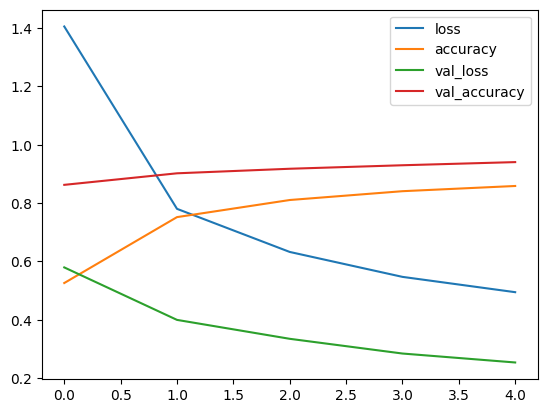

In [ ]:
pd.DataFrame(model.history.history).plot()